# Convert (Multi)LineString to (Multi)Points

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import os
os.getcwd()

'/home/lukasz/PROGRAMMING/shp-tools/my_files/notebooks'

In [3]:
from shp_tools import conversion

In [4]:
polyline_gdf = gpd.read_file('../../tests/data/conversion/shp/naturalearth_admin_boundary_lines.shp')
#polyline_gdf = gpd.read_file(polyline_path)

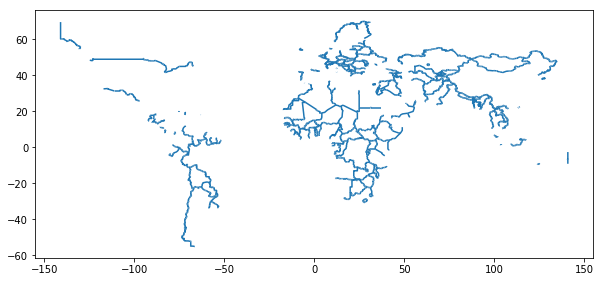

In [5]:
polyline_gdf.plot(figsize=(10,10))

In [6]:
polyline_gdf.head()

,featurecla,name,comment,adm0_usa,adm0_left,adm0_right,adm0_a3_l,adm0_a3_r,sov_a3_l,sov_a3_r,type,labelrank,scalerank,min_zoom,min_label,note,adm0_abr_l,adm0_abr_r,geometry
0,Indefinite (please verify),None,None,1,Canada,United States of America,CAN,USA,Wat,US1,Water Indicator,2,1,2.0,7.6,None,Can.,U.S.A.,LINESTRING (-124.7588659269999 48.494017843000...
1,International boundary (verify),None,None,1,Sweden,Norway,SWE,NOR,SWE,NOR,Water Indicator,2,1,0.0,7.6,None,Swe.,Nor.,LINESTRING (11.4375106135067 58.99172086270566...
2,International boundary (verify),None,None,1,Denmark,Germany,DNK,DEU,DN1,DEU,Water Indicator,5,1,0.0,8.0,None,Den.,Ger.,(LINESTRING (8.394091838000094 55.096328024000...
3,International boundary (verify),None,None,1,Singapore,Malaysia,SGP,MYS,SGP,MYS,Water Indicator,3,1,0.0,9.0,None,Sing.,Malay.,"LINESTRING (104.067683554 1.277390849000057, 1..."
4,International boundary (verify),None,None,1,Uruguay,Argentina,URY,ARG,URY,ARG,Water Indicator,2,1,0.0,8.0,None,Ury.,Arg.,LINESTRING (-58.20011185221784 -32.44712991235...


In [7]:
len(polyline_gdf)

462

In [8]:
geoseries = polyline_gdf.geometry

## MultiPoints

In [11]:
#points_gdf = gpd.extract_nodes(polyline_gdf, explode=False)
points_geoseries = conversion.extract_nodes(geoseries, explode=False)

In [12]:
#points_gdf.head()
points_geoseries.head()

0    (POINT (-124.7588659269999 48.49401784300004),...
1    (POINT (11.4375106135067 58.99172086270566), P...
2    (POINT (8.394091838000094 55.09632802400002), ...
3    (POINT (104.067683554 1.277390849000057), POIN...
4    (POINT (-58.20011185221784 -32.44712991235971)...
Name: geometry, dtype: object

In [13]:
len(points_geoseries)

462

## Points

In [14]:
points_geoseries = conversion.extract_nodes(geoseries, explode=True)

In [22]:
points_geoseries.head()

0  0    POINT (-124.7588659269999 48.49401784300004)
   1    POINT (-124.5828559979999 48.44391754200002)
   2    POINT (-124.3171357839999 48.36828908300008)
   3     POINT (-124.1246410729999 48.3135379030001)
   4        POINT (-124.005113485 48.27958648700006)
Name: geometry, dtype: object

In [16]:
len(points_geoseries)

77605

In [17]:
extract_nodes_single_geoseries = gpd.GeoSeries(conversion.extract_nodes(geoseries, explode=True)
                                            .reset_index()
                                            .drop(['level_0', 'level_1'], axis=1)
                                            .geometry)
#points_geoseries_ri = points_geoseries.reset_index().drop(['level_0','level_1'], axis=1).geometry
#points_geoseries_ri.head()
extract_nodes_single_geoseries.head()

0    POINT (-124.7588659269999 48.49401784300004)
1    POINT (-124.5828559979999 48.44391754200002)
2    POINT (-124.3171357839999 48.36828908300008)
3     POINT (-124.1246410729999 48.3135379030001)
4        POINT (-124.005113485 48.27958648700006)
Name: geometry, dtype: object

In [11]:
qgis_gdf = gpd.read_file('../../tests/data/conversion/shp/naturalearth_admin_boundary_qgis_points.shp')
qgis_geoseries = qgis_gdf.geometry
qgis_geoseries.head()

0    POINT (-124.7588659269999 48.49401784300004)
1    POINT (-124.5828559979999 48.44391754200002)
2    POINT (-124.3171357839999 48.36828908300008)
3     POINT (-124.1246410729999 48.3135379030001)
4        POINT (-124.005113485 48.27958648700006)
Name: geometry, dtype: object

In [12]:
from pandas.testing import assert_series_equal

for index, geom in points_geoseries_ri.iteritems():
    for index2, geom2 in qgis_geoseries.iteritems():
        if index==index2:
            #print(index, index2)
            if geom.equals(geom2):
                continue
            else:
                print("{} index geoms are different".format(index))
                print("geom1: %s", geom)
                print("geom2: %s", geom2)
        else:
            continue

In [18]:
type(extract_nodes_single_geoseries)

geopandas.geoseries.GeoSeries

In [19]:
type(qgis_geoseries)

geopandas.geoseries.GeoSeries

In [20]:
assert_series_equal(extract_nodes_single_geoseries, qgis_geoseries)

## Plot data

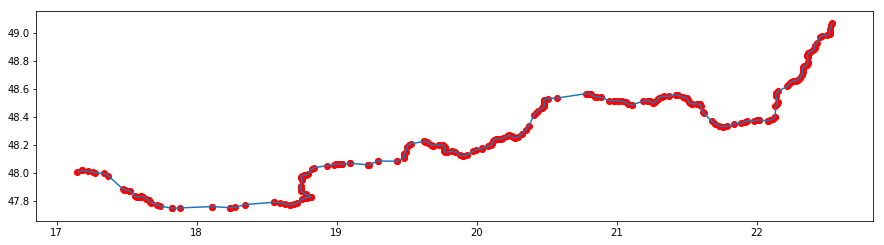

In [37]:
slovakia_polyline = polyline_gdf[polyline_gdf['adm0_left']=='Slovakia']
slovakia_point = points_gdf[points_gdf['adm0_left']=='Slovakia']

ax = slovakia_polyline.plot(figsize=(15,15))
slovakia_point.plot(ax=ax, marker='o', color='red')